# Data Analytics I

<h2 style="color:blue"> -32567 Harshal Tak </h2>
-------------------------------------------------------------------------------------------------------------------------------------------------------

### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples and
14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
boston = pd.read_csv('HousingData.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
boston.shape

(506, 14)

In [ ]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
boston['CHAS'].fillna(0.0,inplace=True)

In [ ]:
np.where(boston['ZN']==0)

(array([  1,   2,   3,   4,   5,  13,  14,  15,  16,  17,  18,  19,  20,
         21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
         34,  35,  36,  37,  38,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  84,  85,
         86,  87,  88,  89,  90,  91,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        185, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218,
        219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
        232, 233, 234, 235, 236, 237, 293, 294, 295

In [ ]:
boston['CRIM'].fillna(boston['CRIM'].mean(),inplace=True)

In [ ]:
boston['ZN'].fillna(0.0,inplace=True)

In [ ]:
boston['INDUS'].mode()

0    18.1
Name: INDUS, dtype: float64

In [ ]:
np.where(boston['INDUS']==18.1)

(array([356, 357, 358, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
        370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
        383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
        396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 407, 408, 409,
        410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
        423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
        436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
        449, 450, 451, 452, 454, 455, 456, 457, 459, 460, 461, 462, 463,
        464, 465, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
        478, 479, 480, 481, 482, 483, 484, 485, 486, 487]),)

In [ ]:
boston['INDUS'].fillna(18.1,inplace=True)

In [ ]:
boston.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
boston['AGE'].fillna(boston['AGE'].mean,inplace=True)

In [ ]:
boston['LSTAT'].median()

11.43

In [ ]:
boston['LSTAT'].fillna(11.53,inplace=True)

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.53,36.2


<ipython-input-74-92af1a3da4a3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'],bins=30)


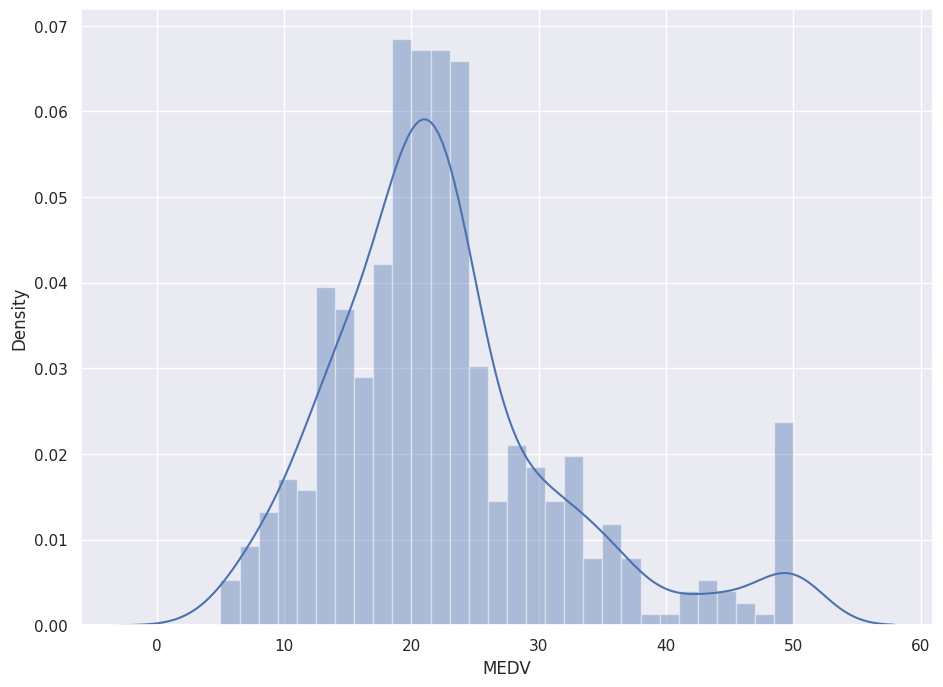

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(boston['MEDV'],bins=30)
plt.show()

<ipython-input-75-2e698aa28dcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = boston.corr().round(2)


<Axes: >

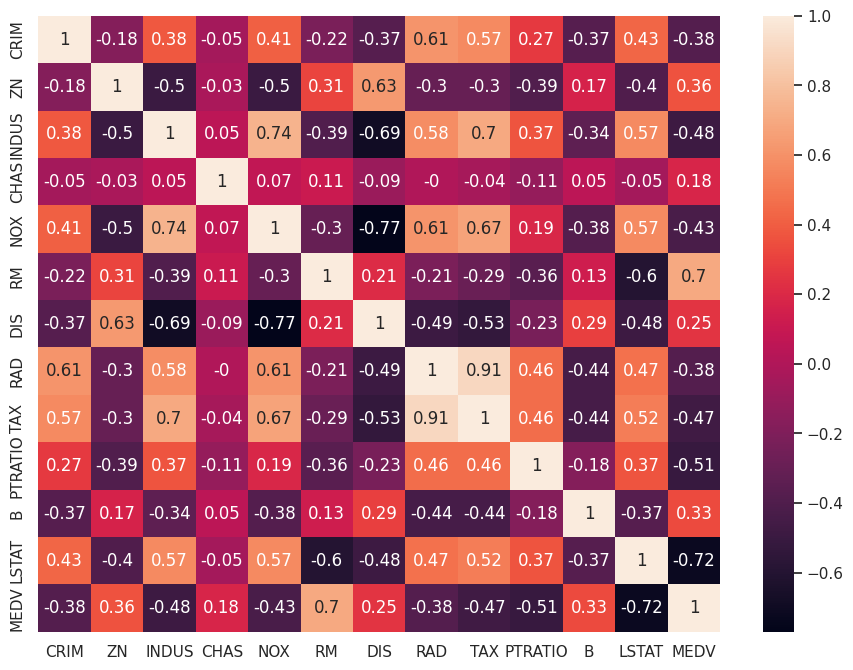

In [ ]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True,cbar=True)

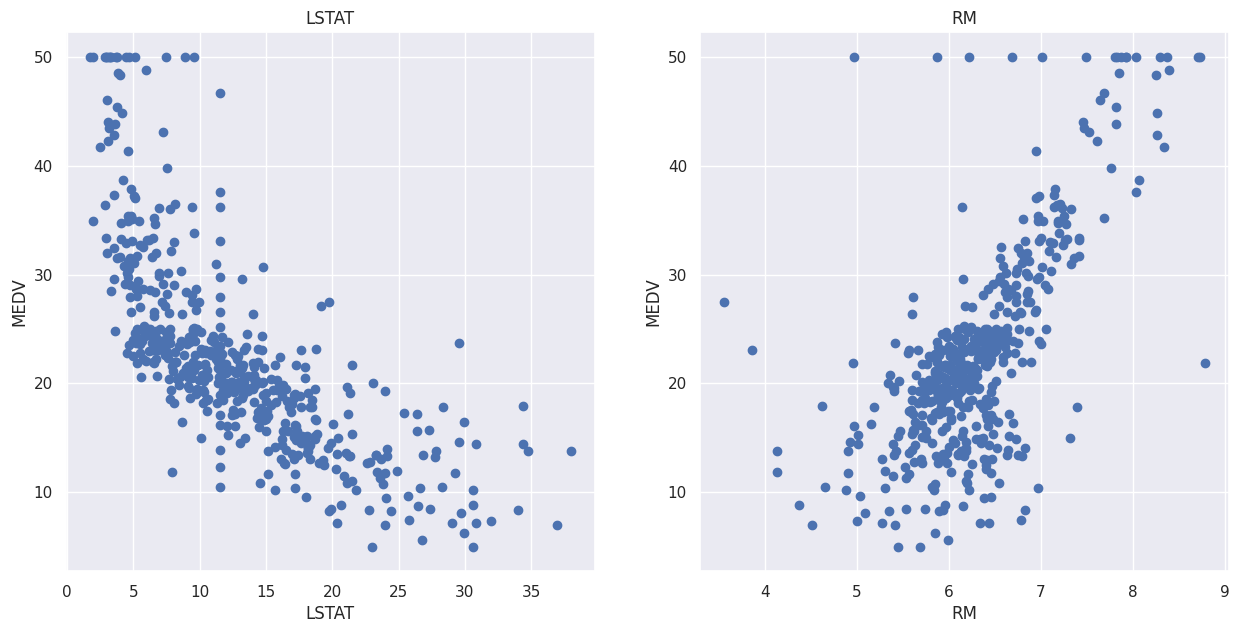

In [ ]:
plt.figure(figsize=(15,7))
features = ['LSTAT','RM']
target = boston['MEDV']

for i,col in enumerate(features):
  plt.subplot(1,len(features),i+1)
  x = boston[col]
  y = target
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("MEDV")


In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
Y = boston['MEDV']

In [ ]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,11.53,7.147


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_train_pred = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_pred)))
r2_score = r2_score(Y_train,y_train_pred)

In [ ]:
print('FOR TRAINING DATA')
print('------MODEL PERFORMANCE-----')
print(f'RMSE SCORE: {rmse}')
print(f'R2 SCORE: {r2_score}')

FOR TRAINING DATA
------MODEL PERFORMANCE-----
RMSE SCORE: 5.741095301603204
R2 SCORE: 0.6163035633072658


In [ ]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
#r2 = r2_score(Y_test, y_test_predict)

In [ ]:
print('FOR TESTING DATA')
print('------MODEL PERFORMANCE-----')
print(f'RMSE SCORE: {rmse}')
#print(f'R2 SCORE: {r2_score}')

FOR TESTING DATA
------MODEL PERFORMANCE-----
RMSE SCORE: 5.115484303476835
